In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./nba_scraped_data.csv')
df

,#,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,YEAR
0,2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Joel Embiid,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7,2023-24
2,2,Luka Doncic,DAL,29.0,37.0,33.7,11.5,23.6,48.9,4.0,...,78.5,0.8,7.6,8.4,9.2,1.4,0.6,4.0,35.5,2023-24
3,3,Shai Gilgeous-Alexander,OKC,29.0,34.7,31.4,11.4,20.8,54.8,1.1,...,91.3,0.9,4.9,5.7,6.3,2.7,0.8,2.0,35.0,2023-24
4,4,Giannis Antetokounmpo,MIL,31.0,34.8,30.9,11.5,18.9,60.8,0.4,...,67.4,2.7,8.4,11.1,5.5,1.3,1.2,3.7,35.3,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,JT Thor,CHA,24.0,15.3,3.2,1.3,3.3,38.0,0.5,...,42.9,0.8,1.6,2.4,0.5,0.3,0.4,0.3,4.2,2023-24
256,256,Jaxson Hayes,LAL,29.0,10.5,3.1,1.3,2.0,66.7,0.0,...,53.6,0.5,1.4,1.9,0.3,0.2,0.3,0.6,4.3,2023-24
257,257,Andre Jackson Jr.,MIL,26.0,9.9,2.5,1.0,1.8,53.2,0.4,...,75.0,0.8,0.8,1.7,0.9,0.3,0.0,0.5,3.9,2023-24
258,258,Cody Zeller,NOP,23.0,9.6,1.8,0.6,1.7,33.3,0.0,...,57.7,1.2,1.8,3.0,1.1,0.2,0.1,0.3,4.2,2023-24


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       260 non-null    object 
 1   PLAYER  259 non-null    object 
 2   TEAM    259 non-null    object 
 3   GP      259 non-null    float64
 4   MIN     259 non-null    float64
 5   PTS     259 non-null    float64
 6   FGM     259 non-null    float64
 7   FGA     259 non-null    float64
 8   FG%     259 non-null    float64
 9   3PM     259 non-null    float64
 10  3PA     259 non-null    float64
 11  3P%     259 non-null    float64
 12  FTM     259 non-null    float64
 13  FTA     259 non-null    float64
 14  FT%     259 non-null    float64
 15  OREB    259 non-null    float64
 16  DREB    259 non-null    float64
 17  REB     259 non-null    float64
 18  AST     259 non-null    float64
 19  STL     259 non-null    float64
 20  BLK     259 non-null    float64
 21  TOV     259 non-null    float64
 22  EF

# Data Cleaning

In [4]:
# Drop rows that have 'NaN' values and '#' column
df = df.dropna()
df = df.drop('#', axis=1)

In [5]:
# Create a rearranged list 
arrange_columns = ['YEAR', 'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF']

# Set dataframe to new columns
df = df[arrange_columns]

df.head()

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,2023-24,Joel Embiid,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,11.6,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7
2,2023-24,Luka Doncic,DAL,29.0,37.0,33.7,11.5,23.6,48.9,4.0,...,8.5,78.5,0.8,7.6,8.4,9.2,1.4,0.6,4.0,35.5
3,2023-24,Shai Gilgeous-Alexander,OKC,29.0,34.7,31.4,11.4,20.8,54.8,1.1,...,8.3,91.3,0.9,4.9,5.7,6.3,2.7,0.8,2.0,35.0
4,2023-24,Giannis Antetokounmpo,MIL,31.0,34.8,30.9,11.5,18.9,60.8,0.4,...,11.3,67.4,2.7,8.4,11.1,5.5,1.3,1.2,3.7,35.3
5,2023-24,De'Aaron Fox,SAC,24.0,35.4,30.2,10.6,21.7,48.8,3.6,...,7.5,72.4,1.0,3.6,4.6,6.2,1.7,0.4,2.6,27.3


In [6]:
# Show the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 1 to 259
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    259 non-null    object 
 1   PLAYER  259 non-null    object 
 2   TEAM    259 non-null    object 
 3   GP      259 non-null    float64
 4   MIN     259 non-null    float64
 5   PTS     259 non-null    float64
 6   FGM     259 non-null    float64
 7   FGA     259 non-null    float64
 8   FG%     259 non-null    float64
 9   3PM     259 non-null    float64
 10  3PA     259 non-null    float64
 11  3P%     259 non-null    float64
 12  FTM     259 non-null    float64
 13  FTA     259 non-null    float64
 14  FT%     259 non-null    float64
 15  OREB    259 non-null    float64
 16  DREB    259 non-null    float64
 17  REB     259 non-null    float64
 18  AST     259 non-null    float64
 19  STL     259 non-null    float64
 20  BLK     259 non-null    float64
 21  TOV     259 non-null    float64
 22  EF

# Visualization

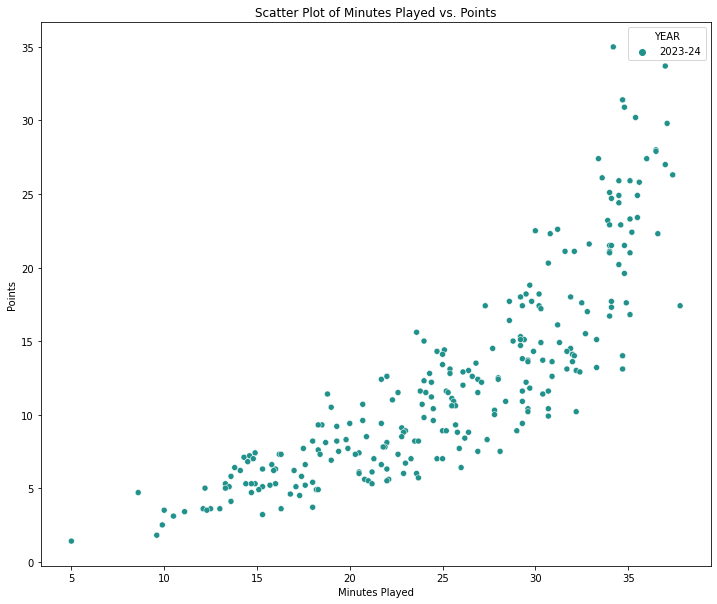

In [7]:
# Create a scatter plot on minutes vs points scored
plt.figure(figsize=(12, 10))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='YEAR', palette='viridis')
plt.title('Scatter Plot of Minutes Played vs. Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()


In [8]:
# Find the top 10 players with the most assists the of the 2023-24 season
assists_df = df.loc[df['AST'] >=6].head(10)
assists_df.sort_values(by='AST', ascending=False, inplace=True)
assists_df

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
8,2023-24,Trae Young,ATL,29.0,36.5,27.9,8.7,20.2,43.2,3.6,...,8.0,87.0,0.5,2.5,3.0,11.2,1.4,0.2,4.2,27.0
2,2023-24,Luka Doncic,DAL,29.0,37.0,33.7,11.5,23.6,48.9,4.0,...,8.5,78.5,0.8,7.6,8.4,9.2,1.4,0.6,4.0,35.5
13,2023-24,Nikola Jokic,DEN,33.0,33.6,26.1,10.1,18.1,55.5,1.1,...,6.0,81.7,3.1,9.2,12.3,9.2,1.2,0.8,2.7,37.7
10,2023-24,Devin Booker,PHX,22.0,36.0,27.4,9.2,19.4,47.7,2.0,...,7.8,89.0,0.9,4.4,5.3,8.1,0.7,0.5,2.9,28.0
14,2023-24,Damian Lillard,MIL,30.0,35.1,25.9,7.5,17.2,43.9,3.3,...,8.2,92.2,0.6,3.8,4.4,6.8,1.0,0.2,2.8,25.2
12,2023-24,Tyrese Maxey,PHI,30.0,37.4,26.3,9.1,19.7,46.1,3.2,...,5.6,88.7,0.6,3.3,3.9,6.5,0.8,0.6,1.5,25.3
3,2023-24,Shai Gilgeous-Alexander,OKC,29.0,34.7,31.4,11.4,20.8,54.8,1.1,...,8.3,91.3,0.9,4.9,5.7,6.3,2.7,0.8,2.0,35.0
5,2023-24,De'Aaron Fox,SAC,24.0,35.4,30.2,10.6,21.7,48.8,3.6,...,7.5,72.4,1.0,3.6,4.6,6.2,1.7,0.4,2.6,27.3
6,2023-24,Kevin Durant,PHX,27.0,37.1,29.8,10.3,19.7,52.4,2.2,...,8.1,87.2,0.4,5.9,6.3,6.1,0.8,1.1,3.5,30.2
1,2023-24,Joel Embiid,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,11.6,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7


In [9]:
# Find the top 10 players with the most rebounds the of the 2023-24 season
rebounds_df = df.loc[df['REB'] >= 6].head(10)
rebounds_df .sort_values(by='REB', ascending=False, inplace=True)
rebounds_df 

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
13,2023-24,Nikola Jokic,DEN,33.0,33.6,26.1,10.1,18.1,55.5,1.1,...,6.0,81.7,3.1,9.2,12.3,9.2,1.2,0.8,2.7,37.7
18,2023-24,Anthony Davis,LAL,30.0,35.5,24.9,9.5,17.3,54.8,0.4,...,7.0,80.9,3.4,8.9,12.3,3.1,1.1,2.5,2.0,32.9
1,2023-24,Joel Embiid,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,11.6,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7
4,2023-24,Giannis Antetokounmpo,MIL,31.0,34.8,30.9,11.5,18.9,60.8,0.4,...,11.3,67.4,2.7,8.4,11.1,5.5,1.3,1.2,3.7,35.3
22,2023-24,Julius Randle,NYK,31.0,35.5,23.4,8.5,18.0,47.2,1.4,...,6.5,77.2,2.0,7.5,9.5,4.9,0.6,0.2,3.3,24.4
2,2023-24,Luka Doncic,DAL,29.0,37.0,33.7,11.5,23.6,48.9,4.0,...,8.5,78.5,0.8,7.6,8.4,9.2,1.4,0.6,4.0,35.5
11,2023-24,Jayson Tatum,BOS,29.0,37.0,27.0,9.2,19.7,47.0,2.9,...,6.9,80.6,0.9,7.6,8.4,4.4,1.1,0.5,2.9,26.8
17,2023-24,LeBron James,LAL,29.0,34.0,25.1,9.3,17.3,53.9,2.3,...,5.7,74.4,1.0,6.7,7.6,7.4,1.4,0.7,3.3,29.5
6,2023-24,Kevin Durant,PHX,27.0,37.1,29.8,10.3,19.7,52.4,2.2,...,8.1,87.2,0.4,5.9,6.3,6.1,0.8,1.1,3.5,30.2
27,2023-24,Kyle Kuzma,WAS,31.0,31.2,22.6,8.7,18.8,46.5,2.4,...,3.6,76.6,0.9,5.2,6.1,4.3,0.3,0.6,2.6,20.4


In [10]:
# Find the top 10 scorers of the 2023-24 season
top_ten_df = df.loc[df['YEAR'] == '2023-24'].head(10)
top_ten_df.sort_values(by='PTS', ascending=False, inplace=True)
top_ten_df

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,2023-24,Joel Embiid,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,11.6,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7
2,2023-24,Luka Doncic,DAL,29.0,37.0,33.7,11.5,23.6,48.9,4.0,...,8.5,78.5,0.8,7.6,8.4,9.2,1.4,0.6,4.0,35.5
3,2023-24,Shai Gilgeous-Alexander,OKC,29.0,34.7,31.4,11.4,20.8,54.8,1.1,...,8.3,91.3,0.9,4.9,5.7,6.3,2.7,0.8,2.0,35.0
4,2023-24,Giannis Antetokounmpo,MIL,31.0,34.8,30.9,11.5,18.9,60.8,0.4,...,11.3,67.4,2.7,8.4,11.1,5.5,1.3,1.2,3.7,35.3
5,2023-24,De'Aaron Fox,SAC,24.0,35.4,30.2,10.6,21.7,48.8,3.6,...,7.5,72.4,1.0,3.6,4.6,6.2,1.7,0.4,2.6,27.3
6,2023-24,Kevin Durant,PHX,27.0,37.1,29.8,10.3,19.7,52.4,2.2,...,8.1,87.2,0.4,5.9,6.3,6.1,0.8,1.1,3.5,30.2
7,2023-24,Donovan Mitchell,CLE,23.0,36.5,28.0,9.8,21.3,46.0,3.0,...,6.0,89.1,1.1,4.5,5.6,5.7,1.8,0.5,2.6,26.8
8,2023-24,Trae Young,ATL,29.0,36.5,27.9,8.7,20.2,43.2,3.6,...,8.0,87.0,0.5,2.5,3.0,11.2,1.4,0.2,4.2,27.0
9,2023-24,Stephen Curry,GSW,29.0,33.4,27.4,8.6,18.8,45.8,4.7,...,5.9,93.0,0.5,4.0,4.5,4.4,0.7,0.4,3.1,23.7
10,2023-24,Devin Booker,PHX,22.0,36.0,27.4,9.2,19.4,47.7,2.0,...,7.8,89.0,0.9,4.4,5.3,8.1,0.7,0.5,2.9,28.0


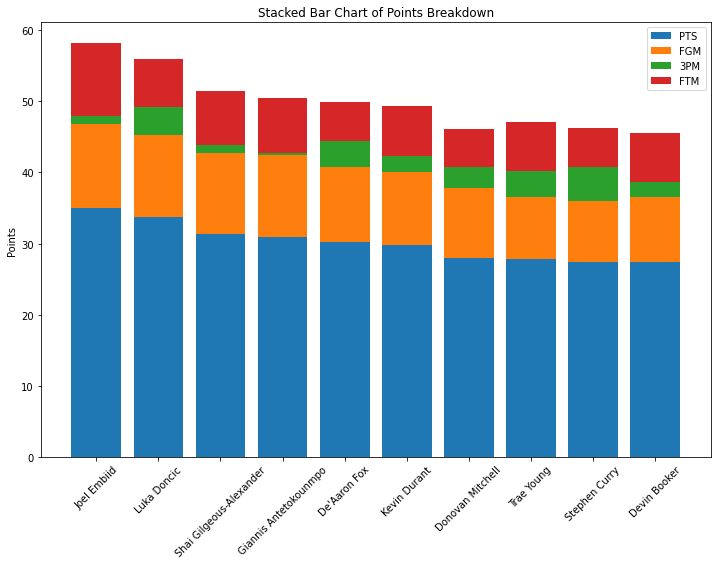

In [11]:
# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack the bars for different categories
bottom = None
for col in ['PTS', 'FGM', '3PM', 'FTM']:
    ax.bar(top_ten_df['PLAYER'], top_ten_df[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = top_ten_df[col]
    else:
        bottom += top_ten_df[col]

ax.set_ylabel('Points')
ax.set_title('Stacked Bar Chart of Points Breakdown')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [12]:
# Create a dataframe for players with the most rebounds
top_ten_rebounds = df.loc[df['REB'] > 4].head(10)
top_ten_rebounds = top_ten_rebounds[['PLAYER', 'YEAR', 'MIN', 'PTS', 'REB']]
top_ten_rebounds_sorted = top_ten_rebounds.sort_values(by='REB', ascending=False)

In [13]:
print(top_ten_rebounds_sorted)

                     PLAYER     YEAR   MIN   PTS   REB
1               Joel Embiid  2023-24  34.2  35.0  11.7
4     Giannis Antetokounmpo  2023-24  34.8  30.9  11.1
2               Luka Doncic  2023-24  37.0  33.7   8.4
11             Jayson Tatum  2023-24  37.0  27.0   8.4
6              Kevin Durant  2023-24  37.1  29.8   6.3
3   Shai Gilgeous-Alexander  2023-24  34.7  31.4   5.7
7          Donovan Mitchell  2023-24  36.5  28.0   5.6
10             Devin Booker  2023-24  36.0  27.4   5.3
5              De'Aaron Fox  2023-24  35.4  30.2   4.6
9             Stephen Curry  2023-24  33.4  27.4   4.5


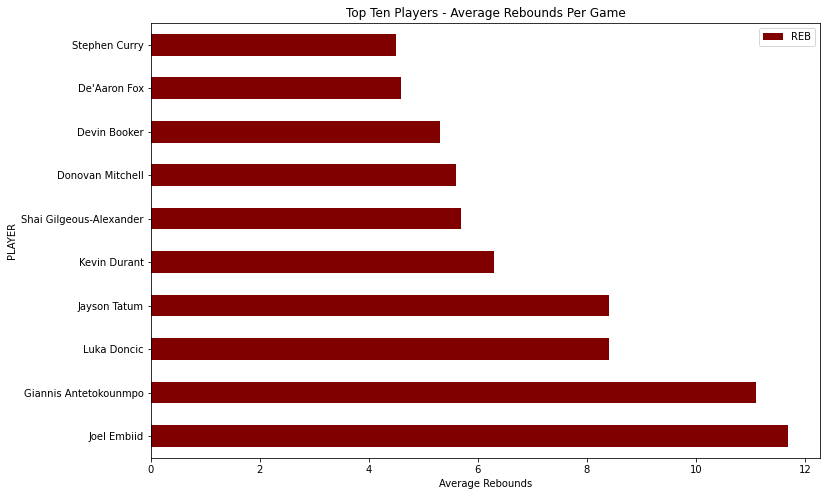

In [14]:
# Plotting bars in descending order
top_ten_rebounds_sorted.plot.barh(x='PLAYER', y='REB', color='maroon', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Average Rebounds')
plt.title('Top Ten Players - Average Rebounds Per Game')

# Display the plot
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 1 to 259
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    259 non-null    object 
 1   PLAYER  259 non-null    object 
 2   TEAM    259 non-null    object 
 3   GP      259 non-null    float64
 4   MIN     259 non-null    float64
 5   PTS     259 non-null    float64
 6   FGM     259 non-null    float64
 7   FGA     259 non-null    float64
 8   FG%     259 non-null    float64
 9   3PM     259 non-null    float64
 10  3PA     259 non-null    float64
 11  3P%     259 non-null    float64
 12  FTM     259 non-null    float64
 13  FTA     259 non-null    float64
 14  FT%     259 non-null    float64
 15  OREB    259 non-null    float64
 16  DREB    259 non-null    float64
 17  REB     259 non-null    float64
 18  AST     259 non-null    float64
 19  STL     259 non-null    float64
 20  BLK     259 non-null    float64
 21  TOV     259 non-null    float64
 22  EF

In [16]:
# Export cleaned data frame
file_path = 'nba_cleaned_data.csv'
df.to_csv(file_path, index=False)

# Machine Learning


In [17]:
df.columns

Index(['YEAR', 'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'EFF'],
      dtype='object')

Text(0.5, 1.0, 'Correlation')

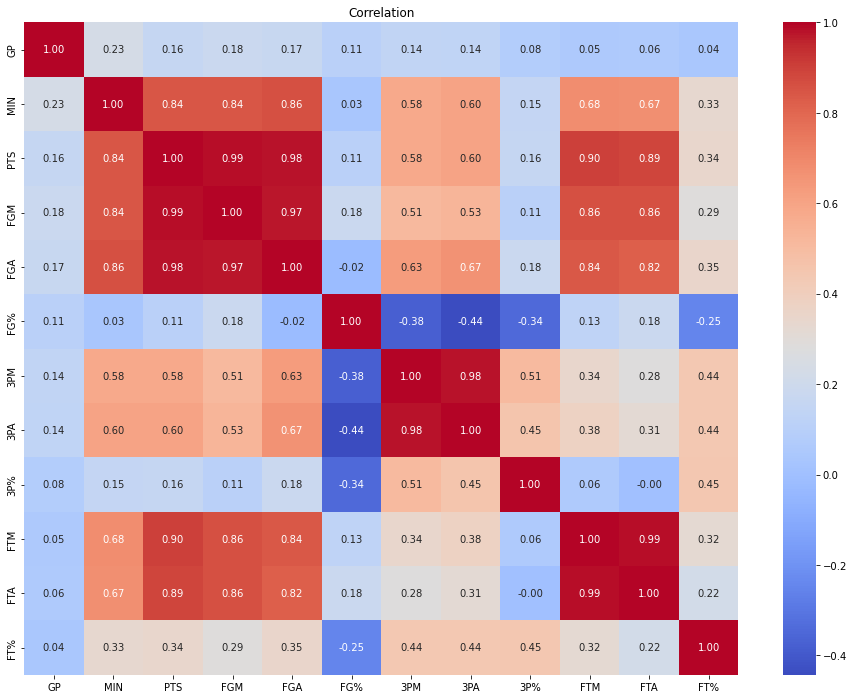

In [18]:
heatmap_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


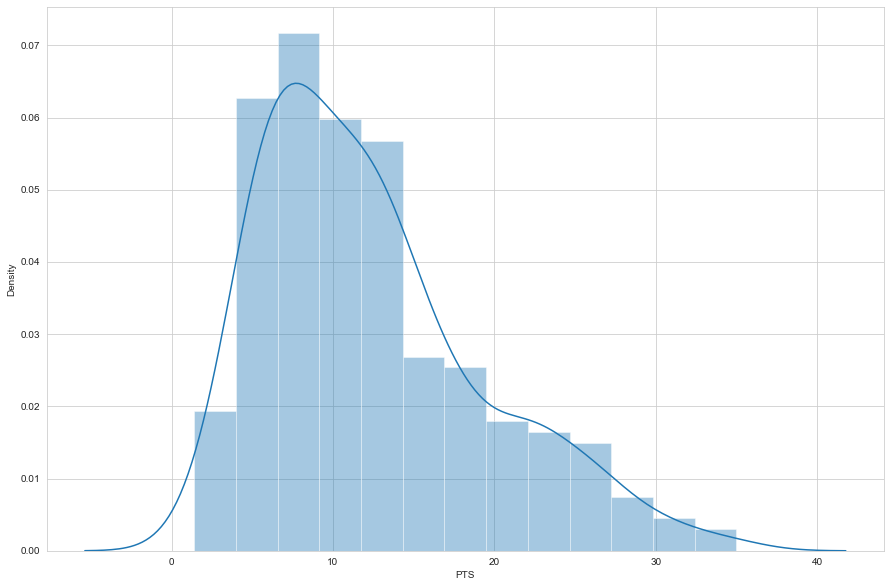

In [19]:
# Distribution of the values in the Points column
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))
sns.distplot(df['PTS'])
plt.show()